<h1 style="color: lightblue;">CAMBIO EN RAMA BURGOS</h1>
<h1></h1>

# PRIMER ENTREGA

#### Entorno de trabajo

In [78]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, Lasso
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


%matplotlib inline

#### lectura de datos

In [79]:
df_employee_survey = pd.read_csv("https://raw.githubusercontent.com/JavierBurgos-web/PROYECTO_ANALITICA_II/main/employee_survey_data.csv")
df_general = pd.read_csv("https://raw.githubusercontent.com/JavierBurgos-web/PROYECTO_ANALITICA_II/main/general_data.csv")
df_manager_survey = pd.read_csv("https://raw.githubusercontent.com/JavierBurgos-web/PROYECTO_ANALITICA_II/main/manager_survey_data.csv")
df_time_work = pd.read_csv("https://raw.githubusercontent.com/JavierBurgos-web/PROYECTO_ANALITICA_II/main/time_work.csv")

# a. Diseño de solución propuesto

En primer instancia planteamos el uso de un modelo de regresión logística, puesto que dicho modelo es adecuado para problemas de clasificación binaria, como es el caso de este, donde se trata de predecir si un empleado abandonará su empleo o no.

Sin embargo también planteamos la alternativa de usar Árboles de decisión, ya que son un modelo de aprendizaje supervisado que puede ser utilizado para problemas de clasificación y regresión, con la desventaja que pueden ser menos precisos que los modelos de regresión logística.

# b. Limpieza y transformación de los datos

#### Información de cada tabla

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 4 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   EmployeeID               4410 non-null   int64  
 1   EnvironmentSatisfaction  4385 non-null   float64
 2   JobSatisfaction          4390 non-null   float64
 3   WorkLifeBalance          4372 non-null   float64
dtypes: float64(3), int64(1)
memory usage: 137.9 KB
None


,EmployeeID,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance
0,1,3.0,4.0,2.0
1,2,3.0,2.0,4.0
2,3,2.0,2.0,1.0


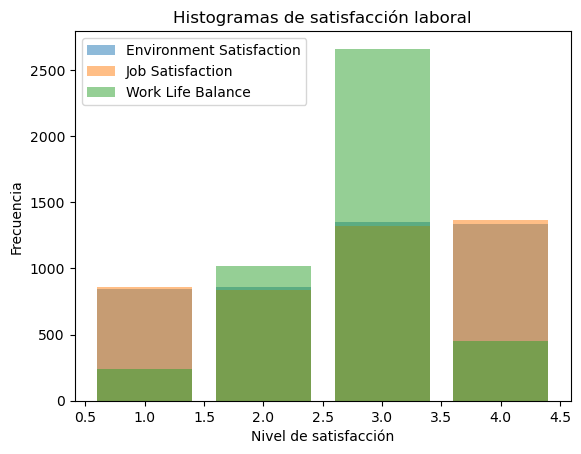

In [80]:
print(df_employee_survey.info())
display(df_employee_survey.head(3))


values_1 = df_employee_survey['EnvironmentSatisfaction'].value_counts()
values_2 = df_employee_survey['JobSatisfaction'].value_counts()
values_3 = df_employee_survey['WorkLifeBalance'].value_counts()

fig, ax = plt.subplots()

# Crear los histogramas
ax.bar(values_1.index, values_1, alpha=0.5, label='Environment Satisfaction')
ax.bar(values_2.index, values_2, alpha=0.5, label='Job Satisfaction')
ax.bar(values_3.index, values_3, alpha=0.5, label='Work Life Balance')

ax.set_title('Histogramas de satisfacción laboral')
ax.set_xlabel('Nivel de satisfacción')
ax.set_ylabel('Frecuencia')

ax.legend()
plt.show()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      4410 non-null   int64  
 1   Attrition                4410 non-null   object 
 2   BusinessTravel           4410 non-null   object 
 3   Department               4410 non-null   object 
 4   DistanceFromHome         4410 non-null   int64  
 5   Education                4410 non-null   int64  
 6   EducationField           4410 non-null   object 
 7   EmployeeCount            4410 non-null   int64  
 8   EmployeeID               4410 non-null   int64  
 9   Gender                   4410 non-null   object 
 10  JobLevel                 4410 non-null   int64  
 11  JobRole                  4410 non-null   object 
 12  MaritalStatus            4410 non-null   object 
 13  MonthlyIncome            4410 non-null   int64  
 14  NumCompaniesWorked      

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,...,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,...,1.0,Y,11,8,0,1.0,6,1,0,0
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,...,0.0,Y,23,8,1,6.0,3,5,1,4
2,32,No,Travel_Frequently,Research & Development,17,4,Other,1,3,Male,...,1.0,Y,15,8,3,5.0,2,5,0,3


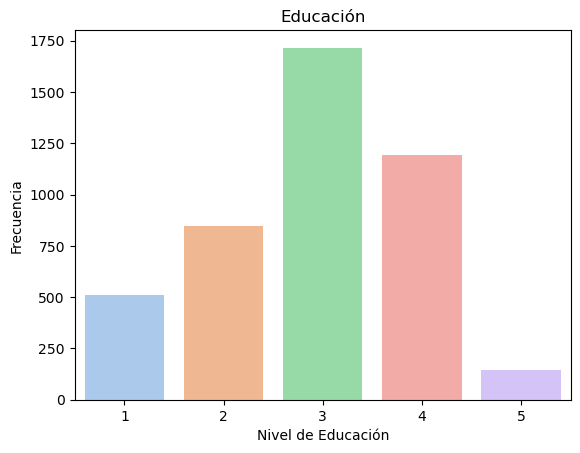

In [81]:
print(df_general.info())
display(df_general.head(3))


values = df_general['Education'].value_counts()
sns.barplot(x=values.index, y=values, palette='pastel')

plt.title('Educación')
plt.xlabel('Nivel de Educación')
plt.ylabel('Frecuencia')
plt.show()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   EmployeeID         4410 non-null   int64
 1   JobInvolvement     4410 non-null   int64
 2   PerformanceRating  4410 non-null   int64
dtypes: int64(3)
memory usage: 103.5 KB
None


,EmployeeID,JobInvolvement,PerformanceRating
0,1,3,3
1,2,2,4
2,3,3,3


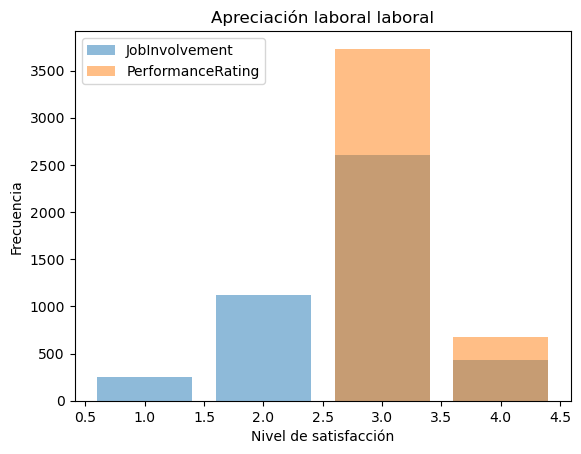

In [82]:
print(df_manager_survey.info())
display(df_manager_survey.head(3))


values_1 = df_manager_survey['JobInvolvement'].value_counts()
values_2 = df_manager_survey['PerformanceRating'].value_counts()

fig, ax = plt.subplots()

# Crear los histogramas
ax.bar(values_1.index, values_1, alpha=0.5, label='JobInvolvement')
ax.bar(values_2.index, values_2, alpha=0.5, label='PerformanceRating')

ax.set_title('Apreciación laboral laboral')
ax.set_xlabel('Nivel de satisfacción')
ax.set_ylabel('Frecuencia')

ax.legend()
plt.show()

In [83]:
df_time_work.info()
df_time_work.head(3)

<class 'pandas.core.frame.DataFrame'>
Index: 4410 entries, 1;6 to 4410;6
Data columns (total 1 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   EmployeeID;mean_time  4410 non-null   int64
dtypes: int64(1)
memory usage: 68.9+ KB


,EmployeeID;mean_time
1;6,8702
2;7,316
3;6,8161


Corrección en lectura de la tabla 'time_work' Que esta separada por punto y coma

#### Lectura de tabla separada por ;

In [84]:
df_time_work = pd.read_csv("https://raw.githubusercontent.com/JavierBurgos-web/PROYECTO_ANALITICA_II/main/time_work.csv", sep=";")
df_time_work.info()
display(df_time_work.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   EmployeeID  4410 non-null   int64 
 1   mean_time   4410 non-null   object
dtypes: int64(1), object(1)
memory usage: 69.0+ KB


,EmployeeID,mean_time
0,1,"6,8702"
1,2,"7,316"
2,3,"6,8161"
3,4,"6,7892"
4,5,"7,8776"


#### Union de las tablas

In [85]:
df_employee_survey = pd.read_csv("https://raw.githubusercontent.com/JavierBurgos-web/PROYECTO_ANALITICA_II/main/employee_survey_data.csv")
df_general = pd.read_csv("https://raw.githubusercontent.com/JavierBurgos-web/PROYECTO_ANALITICA_II/main/general_data.csv")
df_manager_survey = pd.read_csv("https://raw.githubusercontent.com/JavierBurgos-web/PROYECTO_ANALITICA_II/main/manager_survey_data.csv")
df_time_work = pd.read_csv("https://raw.githubusercontent.com/JavierBurgos-web/PROYECTO_ANALITICA_II/main/time_work.csv", sep=";")

In [86]:
df = df_employee_survey.merge(df_general, on="EmployeeID")
df = df.merge(df_manager_survey, on="EmployeeID")
df = df.merge(df_time_work, on="EmployeeID")

df.info()
df.head(3)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4410 entries, 0 to 4409
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   EmployeeID               4410 non-null   int64  
 1   EnvironmentSatisfaction  4385 non-null   float64
 2   JobSatisfaction          4390 non-null   float64
 3   WorkLifeBalance          4372 non-null   float64
 4   Age                      4410 non-null   int64  
 5   Attrition                4410 non-null   object 
 6   BusinessTravel           4410 non-null   object 
 7   Department               4410 non-null   object 
 8   DistanceFromHome         4410 non-null   int64  
 9   Education                4410 non-null   int64  
 10  EducationField           4410 non-null   object 
 11  EmployeeCount            4410 non-null   int64  
 12  Gender                   4410 non-null   object 
 13  JobLevel                 4410 non-null   int64  
 14  JobRole                 

,EmployeeID,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,JobInvolvement,PerformanceRating,mean_time
0,1,3.0,4.0,2.0,51,No,Travel_Rarely,Sales,6,2,...,8,0,1.0,6,1,0,0,3,3,"6,8702"
1,2,3.0,2.0,4.0,31,Yes,Travel_Frequently,Research & Development,10,1,...,8,1,6.0,3,5,1,4,2,4,"7,316"
2,3,2.0,2.0,1.0,32,No,Travel_Frequently,Research & Development,17,4,...,8,3,5.0,2,5,0,3,3,3,"6,8161"


#### Columnas con un solo valor

##### Consulta

In [87]:
# Obtener la cantidad de valores únicos en cada columna
nunique_values = df.nunique()

# Seleccionar las columnas con un solo valor
single_value_columns = nunique_values[nunique_values == 1].index

print("Variables con un único valor: ", single_value_columns)

Variables con un único valor:  Index(['EmployeeCount', 'Over18', 'StandardHours'], dtype='object')


In [88]:
df[['EmployeeCount', 'Over18', 'StandardHours']]

,EmployeeCount,Over18,StandardHours
0,1,Y,8
1,1,Y,8
2,1,Y,8
3,1,Y,8
4,1,Y,8
...,...,...,...
4405,1,Y,8
4406,1,Y,8
4407,1,Y,8
4408,1,Y,8


##### Eliminación de columnas con un solo valor y EmployeeID

In [89]:
df_drop_unique = df.drop(["EmployeeID","EmployeeCount", "Over18", "StandardHours"], axis=1)

nunique_values = df_drop_unique.nunique()
single_value_columns = nunique_values[nunique_values == 1].index
print("Variables con un único valor: ", single_value_columns)

Variables con un único valor:  Index([], dtype='object')


#### Correción del tipo de cada variable

In [90]:
df_type = df_drop_unique

#Diccionario
df_type['EnvironmentSatisfaction'] = df_type['EnvironmentSatisfaction'].astype('category')
df_type['JobSatisfaction'] = df_type['JobSatisfaction'].astype('category')
df_type['WorkLifeBalance'] = df_type['WorkLifeBalance'].astype('category')
df_type['Education'] = df_type['Education'].astype('category')
df_type['JobInvolvement'] = df_type['JobInvolvement'].astype('category')
df_type['PerformanceRating'] = df_type['PerformanceRating'].astype('category')

#Asignadas
df_type['JobLevel'] = df_type['JobLevel'].astype('category')
df_type['StockOptionLevel'] = df_type['StockOptionLevel'].astype('category')
df_type['TrainingTimesLastYear'] = df_type['TrainingTimesLastYear'].astype('category')
#df_type['NumCompaniesWorked'] = df_type['NumCompaniesWorked'].astype('int64')

df_type['mean_time'] = df_type['mean_time'].str.replace(',', '.')
df_type['mean_time'] = df_type['mean_time'].astype('float64')

#Object
df_type['Attrition'] = df_type['Attrition'].astype('category')
df_type['BusinessTravel'] = df_type['BusinessTravel'].astype('category')
df_type['Department'] = df_type['Department'].astype('category')
df_type['EducationField'] = df_type['EducationField'].astype('category')
df_type['Gender'] = df_type['Gender'].astype('category')
df_type['JobRole'] = df_type['JobRole'].astype('category')
df_type['MaritalStatus'] = df_type['MaritalStatus'].astype('category')
df_type['Gender'] = df_type['Gender'].astype('category')
df_type['Gender'] = df_type['Gender'].astype('category')
df_type['Gender'] = df_type['Gender'].astype('category')

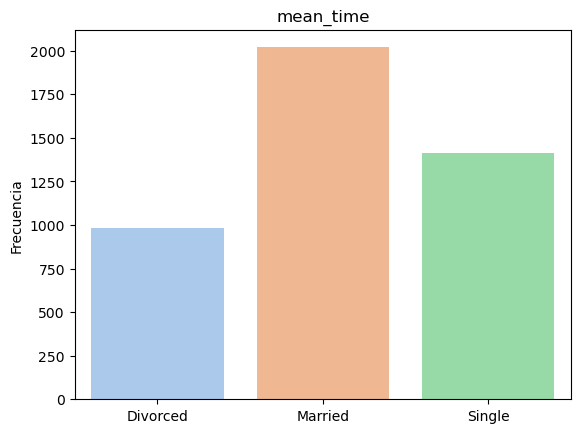

In [91]:
values = df_type['MaritalStatus'].value_counts()
sns.barplot(x=values.index, y=values, palette='pastel')

plt.title('mean_time')
plt.xlabel('')
plt.ylabel('Frecuencia')
plt.show()

In [92]:
df_type.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4410 entries, 0 to 4409
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   EnvironmentSatisfaction  4385 non-null   category
 1   JobSatisfaction          4390 non-null   category
 2   WorkLifeBalance          4372 non-null   category
 3   Age                      4410 non-null   int64   
 4   Attrition                4410 non-null   category
 5   BusinessTravel           4410 non-null   category
 6   Department               4410 non-null   category
 7   DistanceFromHome         4410 non-null   int64   
 8   Education                4410 non-null   category
 9   EducationField           4410 non-null   category
 10  Gender                   4410 non-null   category
 11  JobLevel                 4410 non-null   category
 12  JobRole                  4410 non-null   category
 13  MaritalStatus            4410 non-null   category
 14  MonthlyI

#### Tratamiento para nulos

In [93]:
df_no_nulos = df_type

median_TotalWorkingYears = df_no_nulos['TotalWorkingYears'].median()
median_NumCompaniesWorked = df_no_nulos['NumCompaniesWorked'].median()
mode_WorkLifeBalance = df_no_nulos['WorkLifeBalance'].mode().iloc[0]
mode_JobSatisfaction = df_no_nulos['JobSatisfaction'].mode().iloc[0]
mode_EnvironmentSatisfaction = df_no_nulos['EnvironmentSatisfaction'].mode().iloc[0]


df_no_nulos['TotalWorkingYears'].fillna(median_TotalWorkingYears, inplace=True)
df_no_nulos['NumCompaniesWorked'].fillna(median_NumCompaniesWorked, inplace=True)
df_no_nulos['WorkLifeBalance'].fillna(mode_WorkLifeBalance, inplace=True)
df_no_nulos['JobSatisfaction'].fillna(mode_JobSatisfaction, inplace=True)
df_no_nulos['EnvironmentSatisfaction'].fillna(mode_EnvironmentSatisfaction, inplace=True)

In [94]:
#No se había realizado la conversión de tipo hasta que no se tratara los nulos
df_no_nulos['NumCompaniesWorked'] = df_no_nulos['NumCompaniesWorked'].astype('int64')

In [95]:
df_no_nulos.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4410 entries, 0 to 4409
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   EnvironmentSatisfaction  4410 non-null   category
 1   JobSatisfaction          4410 non-null   category
 2   WorkLifeBalance          4410 non-null   category
 3   Age                      4410 non-null   int64   
 4   Attrition                4410 non-null   category
 5   BusinessTravel           4410 non-null   category
 6   Department               4410 non-null   category
 7   DistanceFromHome         4410 non-null   int64   
 8   Education                4410 non-null   category
 9   EducationField           4410 non-null   category
 10  Gender                   4410 non-null   category
 11  JobLevel                 4410 non-null   category
 12  JobRole                  4410 non-null   category
 13  MaritalStatus            4410 non-null   category
 14  MonthlyI

# c. Análisis exploratorio de los datos

#### Attrition (Categorica) vs catergoricas

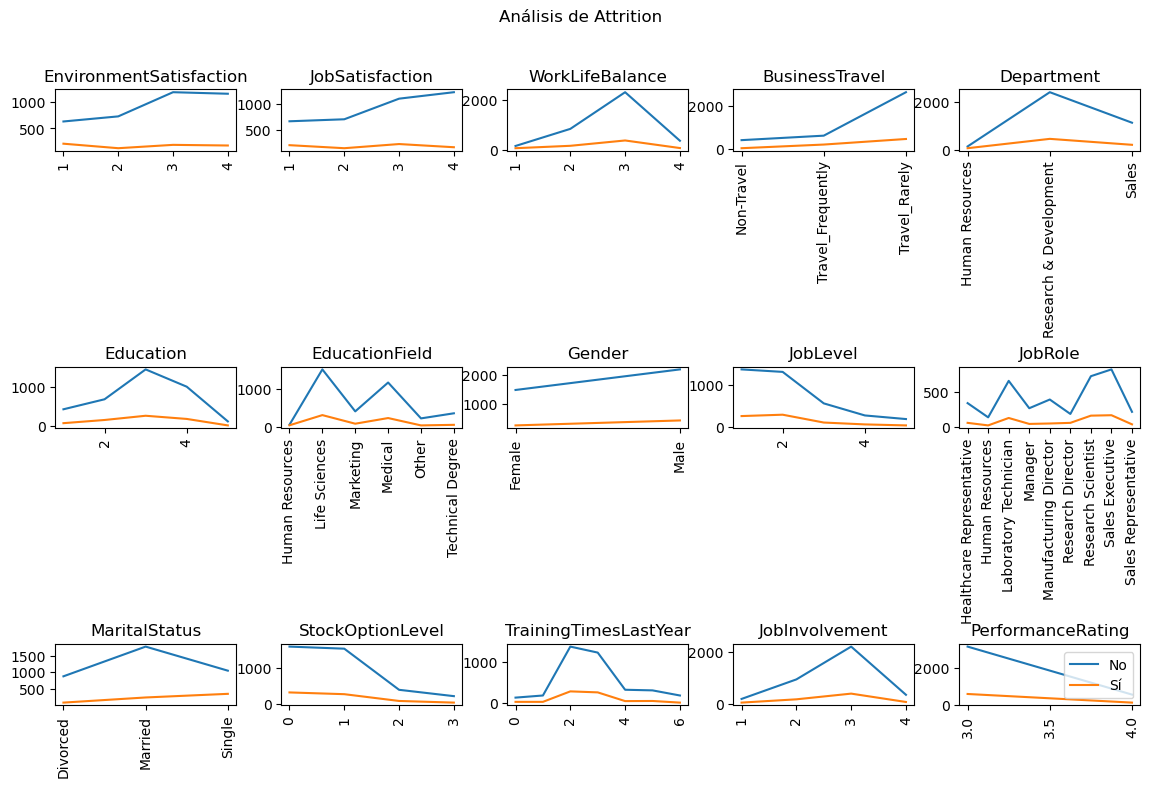

In [96]:
fig, axs = plt.subplots(3, 5, figsize=(14, 8))

gráficos = [
    'EnvironmentSatisfaction',
    'JobSatisfaction',
    'WorkLifeBalance',
    'BusinessTravel',
    'Department',
    'Education',
    'EducationField',
    'Gender',
    'JobLevel',
    'JobRole',
    'MaritalStatus',
    'StockOptionLevel',
    'TrainingTimesLastYear',
    'JobInvolvement',
    'PerformanceRating',
]

for i, gráfico in enumerate(gráficos):
    axs[i // 5, i % 5].plot(df_no_nulos.groupby(gráfico)['Attrition'].value_counts().unstack())
    axs[i // 5, i % 5].set_title(gráfico)
    # Girar las etiquetas del eje x
    axs[i // 5, i % 5].set_xticklabels(axs[i // 5, i % 5].get_xticklabels(), rotation=90)

plt.subplots_adjust(wspace=0.25, hspace=3.5)
plt.legend(['No', 'Sí'], loc='lower right')
plt.suptitle('Análisis de Attrition')
plt.show()

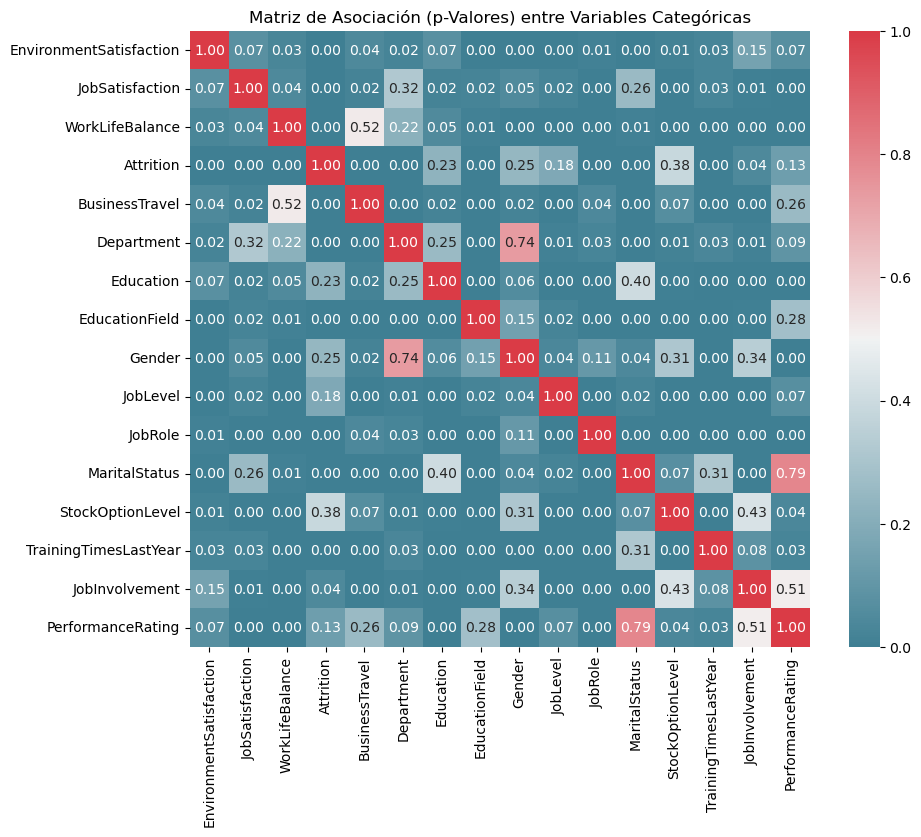

In [97]:
# Seleccionar solo las columnas categóricas
df_categoricas = df_no_nulos.select_dtypes(include=['category'])

# Crear una matriz vacía para almacenar los valores de p-valor
p_values = []

# Correlación de chi-cuadrado y los p-valores
for col1 in df_categoricas.columns:
    row_p_values = []
    for col2 in df_categoricas.columns:
        if col1 == col2:
            row_p_values.append(1.0)  # Poner 1.0 en la diagonal principal
        else:
            contingency_table = pd.crosstab(df_categoricas[col1], df_categoricas[col2])
            _, p, _, _ = chi2_contingency(contingency_table)
            row_p_values.append(p)
    p_values.append(row_p_values)

# Crear un DataFrame de p-valores
p_value_df = pd.DataFrame(p_values, columns=df_categoricas.columns, index=df_categoricas.columns)

plt.figure(figsize=(10, 8))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(p_value_df, annot=True, cmap=cmap, fmt=".2f")
plt.title("Matriz de Asociación (p-Valores) entre Variables Categóricas")
plt.show()

#### Attrition (Categorica) vs numericas

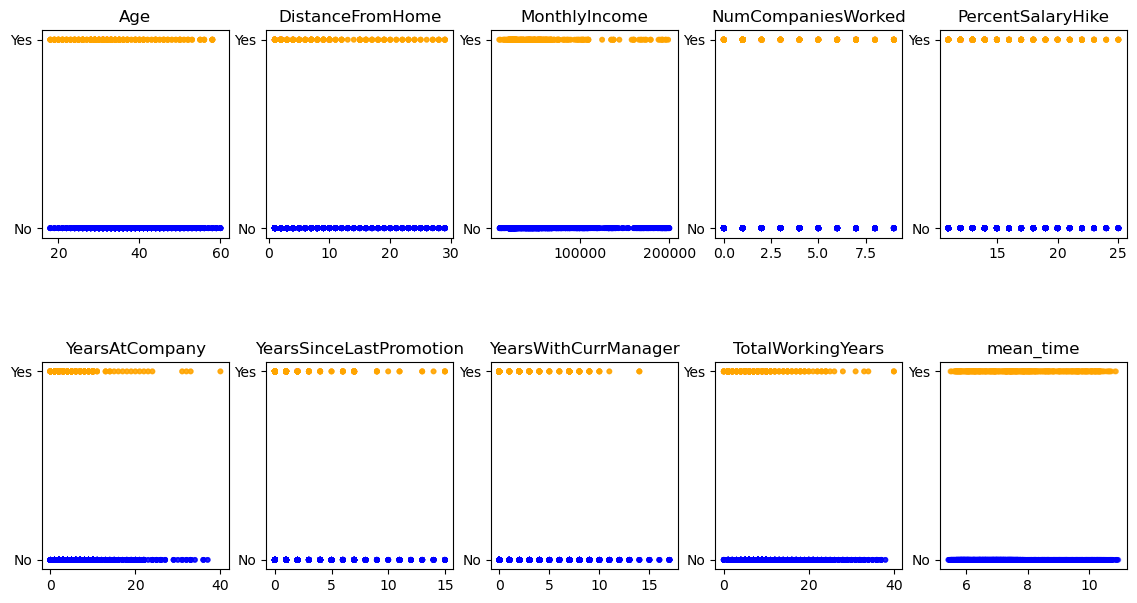

In [98]:
# Crear una figura con tres filas y cinco columnas
fig, axs = plt.subplots(2, 5, figsize=(14, 7))

# Crear los gráficos
for i, gráfico in enumerate(
    [
        'Age',
        'DistanceFromHome',
        'MonthlyIncome',
        'NumCompaniesWorked',
        'PercentSalaryHike',
        'YearsAtCompany',
        'YearsSinceLastPromotion',
        'YearsWithCurrManager',
        'TotalWorkingYears',
        'mean_time',
    ]
):
    # Crear un gráfico de dispersión para la variable numérica
    axs[i // 5, i % 5].scatter(
        df_no_nulos[gráfico], df_no_nulos['Attrition'], alpha=0.5, s=10, 
        c=df_no_nulos['Attrition'].map({'No': 'blue', 'Yes': 'orange'}),
    )
    # Agregar una leyenda
    axs[i // 5, i % 5].set_title(gráfico)
    # Ajustar el diseño de la figura
    plt.subplots_adjust(wspace=0.2, hspace=0.6)

# Mostrar la figura
plt.show()

#### Relación entre numericas

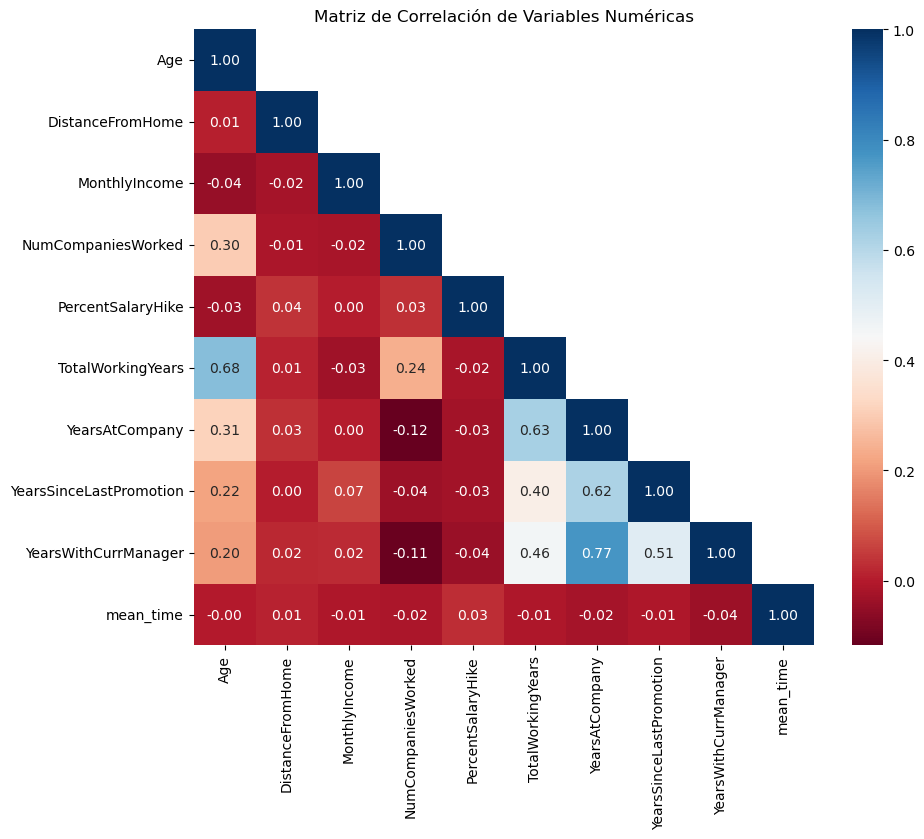

In [99]:
df_numericas = df_no_nulos.select_dtypes(include=[np.number])
correlation_matrix = df_numericas.corr()
mask = np.triu(correlation_matrix, k=1)

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="RdBu", mask=mask)
plt.title("Matriz de Correlación de Variables Numéricas")
plt.show()

# d. Preparación de los datos

Elección de variables. Definición de dataset base

In [100]:
df_base = df_no_nulos

df_base = df_base[['Attrition', 'BusinessTravel', 'Education', 'MaritalStatus', 'StockOptionLevel', 'TotalWorkingYears', 'YearsWithCurrManager','MonthlyIncome']]

In [101]:
df_base.head(3)

,Attrition,BusinessTravel,Education,MaritalStatus,StockOptionLevel,TotalWorkingYears,YearsWithCurrManager,MonthlyIncome
0,No,Travel_Rarely,2,Married,0,1.0,0,131160
1,Yes,Travel_Frequently,1,Single,1,6.0,4,41890
2,No,Travel_Frequently,4,Married,3,5.0,3,193280


In [102]:
df_base = df_base.rename(columns = {'Attrition' : 'target'})

In [103]:
df_base['target'] = df_base['target'].replace({'Yes': 1, 'No': 0})

In [104]:
df_base.target = df_base['target'].astype(float)

In [105]:
df_base.info()
df_base.head(3)


<class 'pandas.core.frame.DataFrame'>
Int64Index: 4410 entries, 0 to 4409
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   target                4410 non-null   float64 
 1   BusinessTravel        4410 non-null   category
 2   Education             4410 non-null   category
 3   MaritalStatus         4410 non-null   category
 4   StockOptionLevel      4410 non-null   category
 5   TotalWorkingYears     4410 non-null   float64 
 6   YearsWithCurrManager  4410 non-null   int64   
 7   MonthlyIncome         4410 non-null   int64   
dtypes: category(4), float64(2), int64(2)
memory usage: 190.2 KB


,target,BusinessTravel,Education,MaritalStatus,StockOptionLevel,TotalWorkingYears,YearsWithCurrManager,MonthlyIncome
0,0.0,Travel_Rarely,2,Married,0,1.0,0,131160
1,1.0,Travel_Frequently,1,Single,1,6.0,4,41890
2,0.0,Travel_Frequently,4,Married,3,5.0,3,193280


In [106]:
# Para cambiar el tipo de dato puede utilizar la función astype de pandas
df_base.BusinessTravel = df_base['BusinessTravel'].astype(str)
df_base.Education = df_base['Education'].astype(str)
df_base.MaritalStatus = df_base['MaritalStatus'].astype(str)
df_base.StockOptionLevel = df_base['StockOptionLevel'].astype(str)
# Convierta las columnas en variables dummy utilizando pd.get_dummies()
df_base = pd.get_dummies(df_base)
# Imprimir primeras 3 filas
df_base.head()

,target,TotalWorkingYears,YearsWithCurrManager,MonthlyIncome,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Education_1,Education_2,Education_3,Education_4,Education_5,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,StockOptionLevel_0,StockOptionLevel_1,StockOptionLevel_2,StockOptionLevel_3
0,0.0,1.0,0,131160,0,0,1,0,1,0,0,0,0,1,0,1,0,0,0
1,1.0,6.0,4,41890,0,1,0,1,0,0,0,0,0,0,1,0,1,0,0
2,0.0,5.0,3,193280,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1
3,0.0,13.0,5,83210,1,0,0,0,0,0,0,1,0,1,0,0,0,0,1
4,0.0,9.0,4,23420,0,0,1,1,0,0,0,0,0,0,1,0,0,1,0


Text(0.5, 1.0, 'Correlación entre variables')

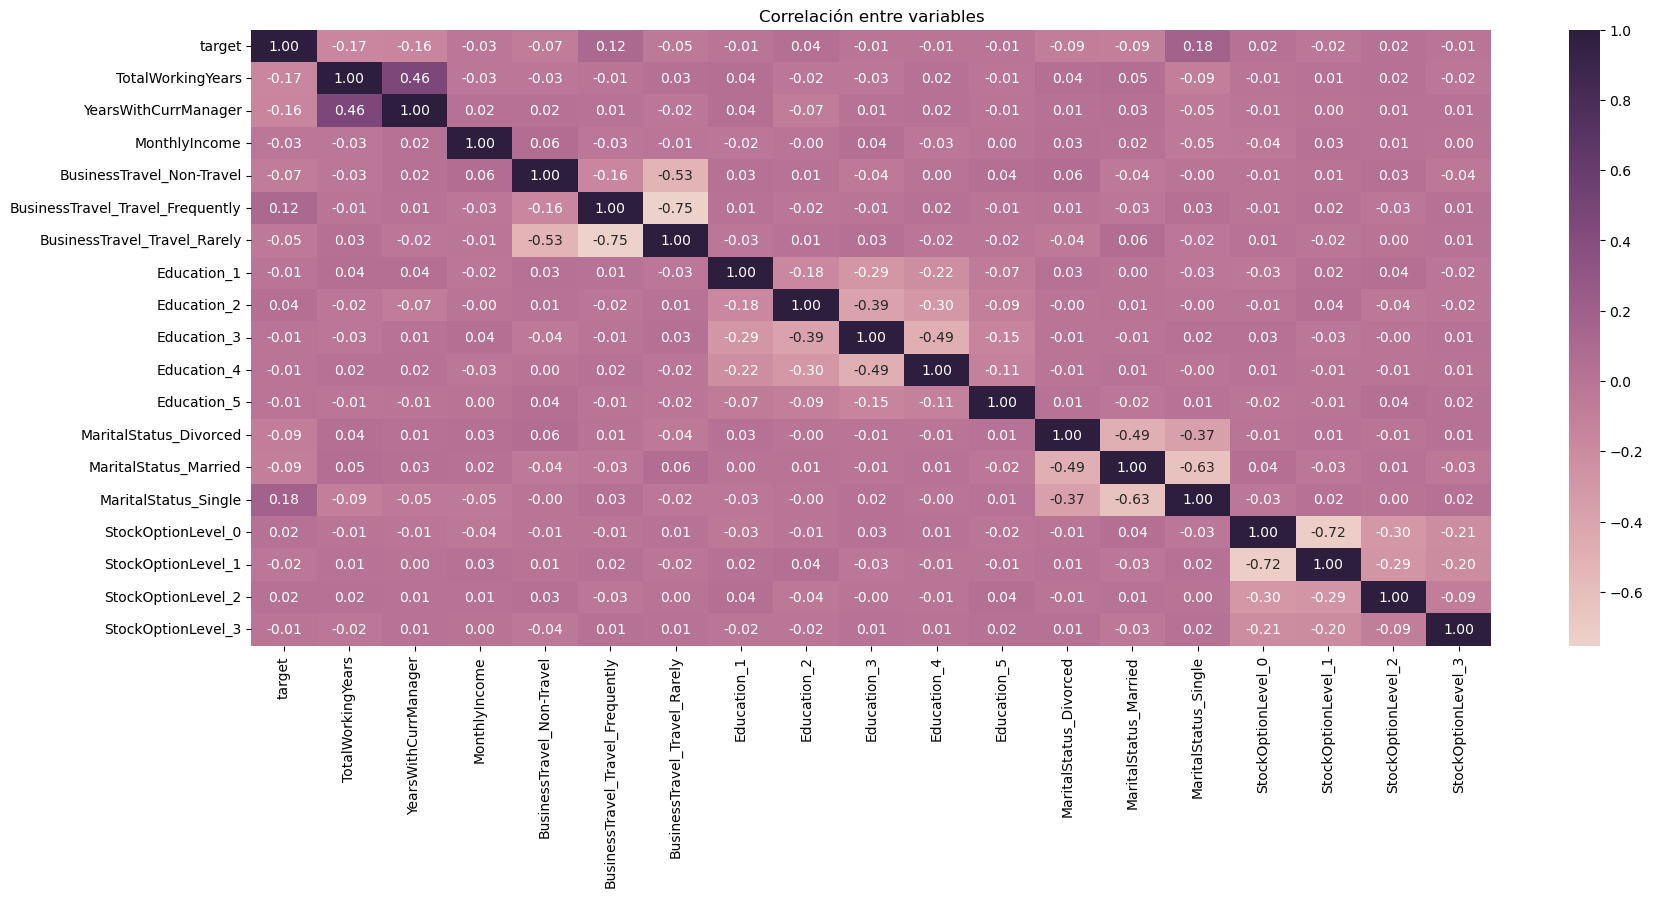

In [107]:
#Análisis de correlación con variables dummys
plt.figure(figsize = (20, 8))
sns.heatmap(df_base.corr(), annot = True, cmap = sns.cubehelix_palette(as_cmap=True), fmt = ".2f")
plt.title("Correlación entre variables")

In [109]:
# Separación de caracteristicas y target (X , y)
y = df_base.target
X = df_base.drop(["target"], axis = 1)
# Separación en conjuntos de entrenamiento y validación con 80% de muestras para entrenamiento

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

#Imprimir Tamaño de dataset

print("Tamaño del conjunto de entrenamiento:",X_train.shape )
print("Tamaño del conjunto de validación:", X_test.shape )

#Cambiar tipo de datos de weigth a float
X.YearsWithCurrManager = X.YearsWithCurrManager.astype(float)
X.MonthlyIncome = X.MonthlyIncome.astype(float)

#Nombre de caracteristicas númericas
numeric_columns=list(X.select_dtypes('float64').columns)

#Estandarización de variables númericas
pipeline=ColumnTransformer([("std_num", StandardScaler() , numeric_columns)], remainder='passthrough')
X_train_std = pipeline.fit_transform(X_train)
X_test_std = pipeline.transform(X_test)

Tamaño del conjunto de entrenamiento: (3528, 18)
Tamaño del conjunto de validación: (882, 18)


Modelo 1: Regresión Líneal Multiple - sin selección de variables

In [111]:
#Crea el modelo
regr = LinearRegression()
#Calibra el modelo
regr.fit(X_train_std, y_train)
#Realice predicciones sobre x_train_std
y_pred = regr.predict(X_train_std)
#Exactitud de modelo
print("Accuracy (Train): "+ str(regr.score(X_train_std,y_train)*100) + "%")

Accuracy (Train): 8.754003016648804%


In [112]:
#Metricas de desempeño de entrenamiento
print("MSE entrenamiento: {}".format(mean_squared_error(y_train, y_pred)))
print("MAE entrenamiento: {}".format(mean_absolute_error(y_train, y_pred)))
print("R2 entrenamiento: {}".format(r2_score(y_train, y_pred)))

MSE entrenamiento: 0.12360319394451535
MAE entrenamiento: 0.2527962527847676
R2 entrenamiento: 0.08754003016648804


Validacion

In [113]:
#Predicciones sobre el conjunto de test
y_hat = regr.predict(X_test_std)
#Exactitud de modelo
print("Accuracy (Test): "+ str(regr.score(X_test_std,y_test)*100) + "%")

Accuracy (Test): 5.194808402788631%


In [114]:
#Metricas de desempeño de validación
print("MSE entrenamiento: {}".format(mean_squared_error(y_test, y_hat)))
print("MAE entrenamiento: {}".format(mean_absolute_error(y_test, y_hat)))
print("R2 entrenamiento: {}".format(r2_score(y_test, y_hat)))

MSE entrenamiento: 0.12733044903188795
MAE entrenamiento: 0.2553799939271711
R2 entrenamiento: 0.05194808402788631


Modelo 2: Random Forest - sin selección de variables

In [115]:
from sklearn.ensemble import RandomForestRegressor

#Crea el modelo
ranfor = RandomForestRegressor(
            n_estimators = 300,
            criterion    = 'squared_error',
            n_jobs       = -1,
            random_state = 123
         )
#Calibra el modelo
ranfor.fit(X_train, y_train)

RandomForestRegressor(n_estimators=300, n_jobs=-1, random_state=123)

In [116]:
#Predicciones sobre el conjunto de train
y_pred_r = ranfor.predict(X_train)
#Exactitud de modelo
print("Accuracy (Train): "+ str(ranfor.score(X_train, y_train)*100) + "%")
#Metricas de desempeño de entrenamiento
print("MSE entrenamiento: {}".format(mean_squared_error(y_train, y_pred_r)))
print("MAE entrenamiento: {}".format(mean_absolute_error(y_train, y_pred_r)))
print("R2 entrenamiento: {}".format(r2_score(y_train, y_pred_r)))

#Predicciones sobre el conjunto de test
y_hat_r = ranfor.predict(X_test)
#Exactitud de modelo
print("\nAccuracy (Test): "+ str(ranfor.score(X_test,y_test)*100) + "%")
#Metricas de desempeño de validación
print("MSE entrenamiento: {}".format(mean_squared_error(y_test, y_hat_r)))
print("MAE entrenamiento: {}".format(mean_absolute_error(y_test, y_hat_r)))
print("R2 entrenamiento: {}".format(r2_score(y_test, y_hat_r)))

Accuracy (Train): 98.43007029405834%
MSE entrenamiento: 0.0021266502897455282
MAE entrenamiento: 0.023811413454270597
R2 entrenamiento: 0.9843007029405834

Accuracy (Test): 88.66335257128091%
MSE entrenamiento: 0.015225963718820863
MAE entrenamiento: 0.0657482993197279
R2 entrenamiento: 0.8866335257128091


Text(0.5, 0, 'Random Forest Feature Importance')

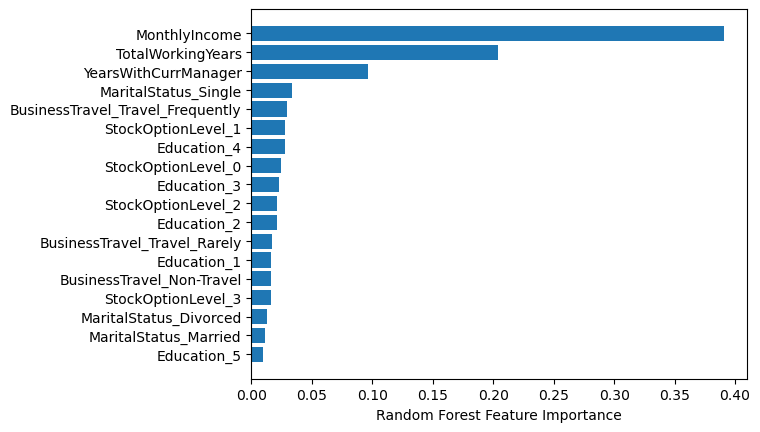

In [117]:
# Importancia de las variables
importance = ranfor.feature_importances_
sorted_idx = ranfor.feature_importances_.argsort()
plt.barh(X.columns[sorted_idx], importance[sorted_idx])
plt.xlabel("Random Forest Feature Importance")

# e. Selección de variables

# f. Selección y aplicación de algoritmos/ técnicas de modelado (al menos 3 algoritmos vistos en clase)